# Supervised Learning with AMEX Data
## American Express - Default Prediction

* This notebook consist in an exploratory analysis from Amex data.

In [1]:
import pandas as pd

## Exploramos el archivo "train_labels"

In [2]:
columns_labels = pd.read_csv('/Users/usuario/workspace/train_labels.csv')

In [8]:
columns_labels.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 458913 entries, 0 to 458912
Data columns (total 2 columns):
 #   Column       Non-Null Count   Dtype 
---  ------       --------------   ----- 
 0   customer_ID  458913 non-null  object
 1   target       458913 non-null  int64 
dtypes: int64(1), object(1)
memory usage: 7.0+ MB


En '/Users/usuario/workspace/train_labels.csv' tenemos un dataset con 2 columnas: el ID de usuario y el target

# Exploramos el archivo "train_data"

In [11]:
df = pd.read_csv('/Users/usuario/workspace/train_data.csv',nrows=100)

In [17]:
df.head()

,customer_ID,S_2,P_2,D_39,B_1,B_2,R_1,S_3,D_41,B_3,...,D_136,D_137,D_138,D_139,D_140,D_141,D_142,D_143,D_144,D_145
0,0000099d6bd597052cdcda90ffabf56573fe9d7c79be5f...,2017-03-09,0.938469,0.001733,0.008724,1.006838,0.009228,0.124035,0.008771,0.004709,...,NaN,NaN,NaN,0.002427,0.003706,0.003818,NaN,0.000569,0.000610,0.002674
1,0000099d6bd597052cdcda90ffabf56573fe9d7c79be5f...,2017-04-07,0.936665,0.005775,0.004923,1.000653,0.006151,0.126750,0.000798,0.002714,...,NaN,NaN,NaN,0.003954,0.003167,0.005032,NaN,0.009576,0.005492,0.009217
2,0000099d6bd597052cdcda90ffabf56573fe9d7c79be5f...,2017-05-28,0.954180,0.091505,0.021655,1.009672,0.006815,0.123977,0.007598,0.009423,...,NaN,NaN,NaN,0.003269,0.007329,0.000427,NaN,0.003429,0.006986,0.002603
3,0000099d6bd597052cdcda90ffabf56573fe9d7c79be5f...,2017-06-13,0.960384,0.002455,0.013683,1.002700,0.001373,0.117169,0.000685,0.005531,...,NaN,NaN,NaN,0.006117,0.004516,0.003200,NaN,0.008419,0.006527,0.009600
4,0000099d6bd597052cdcda90ffabf56573fe9d7c79be5f...,2017-07-16,0.947248,0.002483,0.015193,1.000727,0.007605,0.117325,0.004653,0.009312,...,NaN,NaN,NaN,0.003671,0.004946,0.008889,NaN,0.001670,0.008126,0.009827


In [ ]:
!pip install -U pandas-profiling
!pip install --user --upgrade aws-sam-cli

In [ ]:
from pandas_profiling import ProfileReport
profile = ProfileReport(df)
profile

In [52]:
df2 = pd.read_csv('/Users/usuario/workspace/train_data.csv', usecols=['customer_ID', 'S_2'])

In [53]:
df2.head()

,customer_ID,S_2
0,0000099d6bd597052cdcda90ffabf56573fe9d7c79be5f...,2017-03-09
1,0000099d6bd597052cdcda90ffabf56573fe9d7c79be5f...,2017-04-07
2,0000099d6bd597052cdcda90ffabf56573fe9d7c79be5f...,2017-05-28
3,0000099d6bd597052cdcda90ffabf56573fe9d7c79be5f...,2017-06-13
4,0000099d6bd597052cdcda90ffabf56573fe9d7c79be5f...,2017-07-16


In [54]:
df2.value_counts()

customer_ID                                                       S_2       
0000099d6bd597052cdcda90ffabf56573fe9d7c79be5fbac11a8ed792feb62a  2017-03-09    1
aa5ee11132972c48030b6d70bb5581030881c6a719eed89a7d6c2fae7c00b0d5  2018-02-24    1
aa5ee4d6e08edd3785feb1d22a2b743b360048733afe160963d1ea79e28ac0d3  2017-09-13    1
                                                                  2017-08-11    1
                                                                  2017-07-07    1
                                                                               ..
551332666e152692d055673e6b5c4d91513b9b1b520b59d5536b1cb5d3360641  2017-10-12    1
                                                                  2017-09-11    1
                                                                  2017-08-12    1
                                                                  2017-07-12    1
fffff1d38b785cef84adeace64f8f83db3a0c31e8d92eaba8b115f71cab04681  2018-03-14    1
Length: 5531451, dtyp

([<matplotlib.axis.XTick at 0x12c462940>,
 <a list of 14 Text major ticklabel objects>)

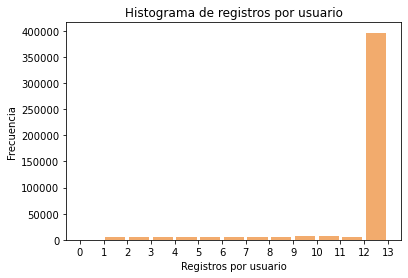

In [56]:
import matplotlib.pyplot as plt
n_casos = [x for x in range(14)]
plt.hist(x=df2.customer_ID.value_counts(), bins=n_casos, color='#F2AB6D', rwidth=0.85)
plt.title('Histograma de registros por usuario')
plt.xlabel('Registros por usuario')
plt.ylabel('Frecuencia')
plt.xticks(n_casos)

Podemos ver que mayoritariamente existen 13 registros por usuario

([<matplotlib.axis.XTick at 0x12dbbc8b0>,
 <a list of 13 Text major ticklabel objects>)

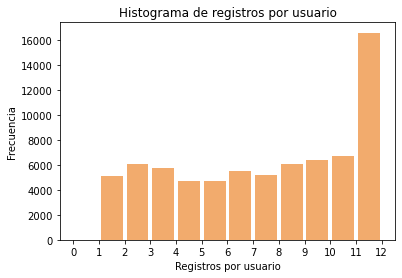

In [57]:
import matplotlib.pyplot as plt
n_casos = [x for x in range(13)]
plt.hist(x=df2.customer_ID.value_counts(), bins=n_casos, color='#F2AB6D', rwidth=0.85)
plt.title('Histograma de registros por usuario')
plt.xlabel('Registros por usuario')
plt.ylabel('Frecuencia')
plt.xticks(n_casos)

Asimismo, podemos observar que existen aproximadamente 16.000 casos de usuarios para los cuales hay 12 registros.
Luego, existen aproximadamente 6.000 usuarios con 1 a 11 registros